In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

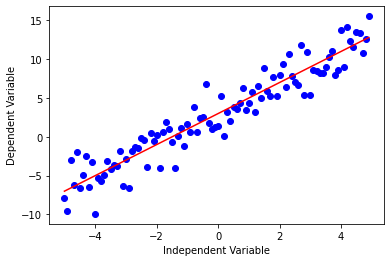

In [6]:
x=np.arange(-5.0,5.0,0.1)
y=2*x+3

y_noise=2*np.random.normal(size=x.size)
y_new=y+y_noise
# plot
plt.plot(x,y_new,'bo')
plt.plot(x,y,'r')
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

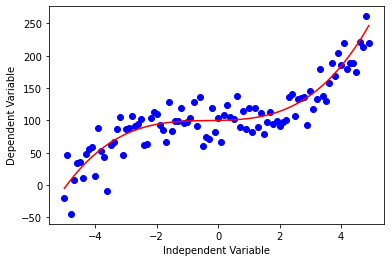

In [12]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 100
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Quadratic

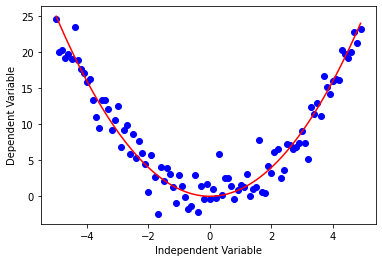

In [14]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2) #y=x*x
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Exponential

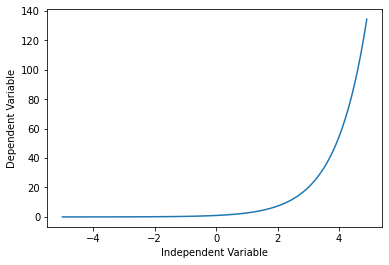

In [15]:
X = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Logarithmic

<ipython-input-16-04d9a16879f0>:3: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


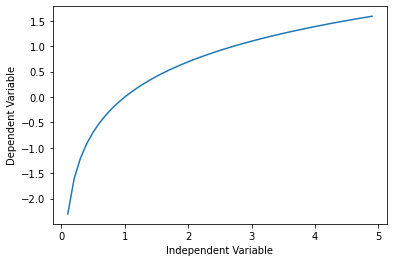

In [16]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

Sigmoidal/Logistic

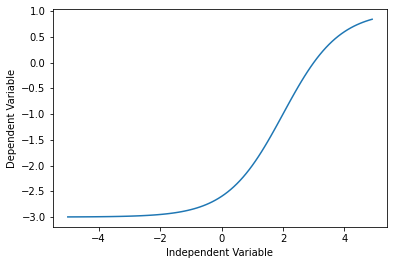

In [17]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

# Non-Linear Regression example

In [18]:
import numpy as np
import pandas as pd

In [20]:
df=pd.read_csv("china_gdp.csv")

In [21]:
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


# plotting dataset

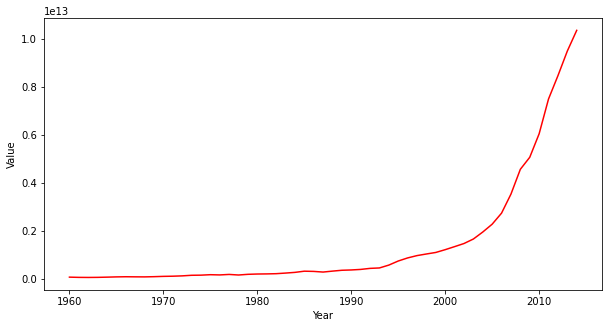

In [27]:
plt.figure(figsize=(10,5))
x=df["Year"].values
y=df["Value"].values
plt.plot(x,y,'r')
plt.xlabel("Year")
plt.ylabel("Value")
plt.show()

choosing a model
From an initial look at the plot, we determine that the logistic function could be a good approximation, since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:

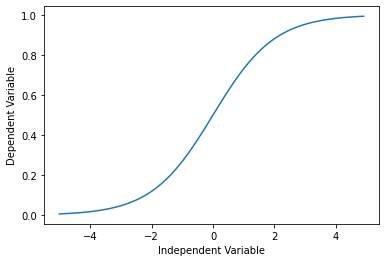

In [28]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

# building the model

In [30]:
def sigmoid(x,b1,b2):
    y=1/(1+np.exp(-b1*(x-b2)))
    return y

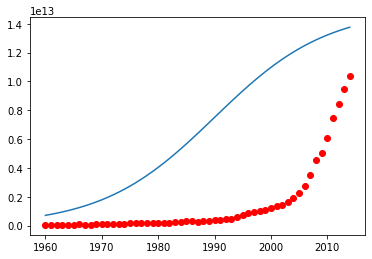

In [35]:
b1 = 0.10
b2 = 1990.0

#logistic function
Y = sigmoid(x, b1 , b2)

#plot initial prediction against datapoints
plt.plot(x, Y*15000000000000.)
plt.plot(x, y, 'ro')

In [37]:
# lets normalize data 
xdata=x/max(x)
ydata=y/max(y)

we can use curve_fit which uses non-linear least squares to fit our sigmoid function, to data

In [38]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


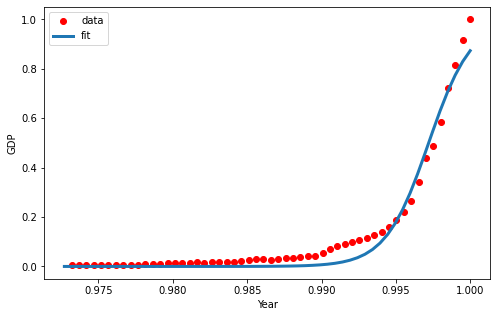

In [39]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [40]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat) )



Mean absolute error: 0.04
Residual sum of squares (MSE): 0.00
R2-score: 0.97
